In [2]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Explain the data. Check It is supervised or Unsupervised. Demonstrate?

In [5]:
# Loading the dataset
insurance_df = pd.read_csv("insurance .csv")
insurance_df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##### The insurance charges is the target feature (dependent variables) to be predicted, since other features are input features (independent variable), it can be considered as supervised learning problem


### 2. Estimate the minimum sample size n to get the 99% accurate predictions. (precision = 0.02)

In [3]:
import math

# Desired confidence level (in decimal form)
confidence_level = 0.99

# Z-score corresponding to the desired confidence level
Z = 2.576

# Estimated proportion (maximum variability as p = 0.5)
p = 0.5

# Desired margin of error or precision
E = 0.02

n = math.ceil((Z**2 * p * (1 - p)) / E**2)

print("Minimum sample size required:", n)


Minimum sample size required: 4148


### 3. Check the data is cleaned or not. If not then clean it (Null values, Row/Column Duplicates, Outliers, Change the string into numbers)

In [14]:
# Displaying the first few rows of the DataFrame
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,1,16884.92400
1,18,male,33.770,1,no,2,1725.55230
2,28,male,33.000,3,no,2,4449.46200
3,33,male,22.705,0,no,1,21984.47061
4,32,male,28.880,0,no,1,3866.85520


In [5]:
# Changing the data type of 'smoker' and 'sex' from object to int
df.smoker = df.smoker.map({"no":0, "yes":1})
df.sex = df.sex.map({"female":0, "male":1})
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [8]:
# Checking the datatype of each feature
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [9]:
# finding out the unique values in the feature 'region'
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [10]:
# Mapping categorical data to integer for the feature 'region'
df.region = df.region.map({'southwest':1, 'southeast':2, 'northwest':1, 'northeast':2})

In [11]:
# Checking duplicate rows
duplicate_rows = df[df.duplicated()]
num_duplicates = len(duplicate_rows)
duplicate_rows

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,1,1639.5631


In [13]:
# Removing duplicate rows and using transpose 
df = df.drop_duplicates()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,1,16884.92400
1,18,male,33.770,1,no,2,1725.55230
2,28,male,33.000,3,no,2,4449.46200
3,33,male,22.705,0,no,1,21984.47061
4,32,male,28.880,0,no,1,3866.85520


In [11]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

mask = ((df<(Q1 - 1.5 * IQR)) | (df>(Q3 + 1.5 * IQR)))
filtered_data = (mask*df).to_numpy()
print("Outliers:")
for datum in filtered_data:
    if np.all(datum != 0):
        print(datum)

Outliers:


### 4. Check that sex and smoking are statistically independent or not.

In [12]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df["sex"],df["smoker"])

chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

# Check if the p-value is less than a chosen significance level (e.g., 0.05) to determine statistical independence
alpha = 0.05
if p <= alpha:
    print("Reject the null hypothesis: sex and smoking are dependent.")
else:
    print("Fail to reject the null hypothesis: sex and smoking are independent.")

Chi-square statistic: 7.469139330086637
p-value: 0.0062765550120107375
Degrees of freedom: 1
Expected frequencies table:
[[526.33208676 135.66791324]
 [536.66791324 138.33208676]]
Reject the null hypothesis: sex and smoking are dependent.


### 5. Check that all regressor variables (independent variable) are independent of each other or not.

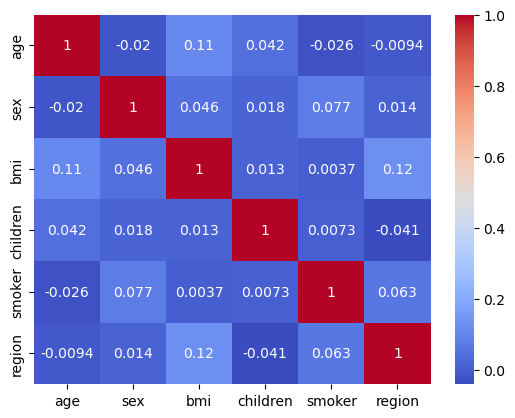

In [13]:
import seaborn as sns

# Select the regressor variables
regressor_variables = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']

# Create a correlation matrix
correlation_matrix = df[regressor_variables].corr()

# Visualize the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

#### Since most of the values are around 0, it can be concluded that all regressor variablesare independent of each other

### 6. Check the dependency between response and regressors.

In [14]:
import statsmodels.api as sm

# Select the response variable and regressor variables
response_variable = 'charges'
regressor_variables = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']

# Create the design matrix
X = df[regressor_variables]
X = sm.add_constant(X)

# Create the response variable vector
y = df[response_variable]

# Fit the ordinary least squares (OLS) model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     663.5
Date:                Fri, 05 Apr 2024   Prob (F-statistic):               0.00
Time:                        13:39:48   Log-Likelihood:                -13541.
No. Observations:                1337   AIC:                         2.710e+04
Df Residuals:                    1330   BIC:                         2.713e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.222e+04   1038.033    -11.770      0.0

### 7. Predict the regression Line to predict the charges for insurance using independent variables.

In [15]:
import pandas as pd
import statsmodels.api as sm

# Assuming df is your DataFrame
X = df[['age', 'bmi', 'children', 'region']]
y = df['charges']

# Add a constant term to the independent variables matrix (needed for statsmodels)
X_with_constant = sm.add_constant(X)
# Fit the linear regression model
model = sm.OLS(y, X_with_constant).fit()

# Create a new DataFrame with the independent variables for prediction
new_data = pd.DataFrame({
    'age': [25],  # Example age
    'bmi': [30.0],  # Example BMI
    'children': [2],  # Example number of children
    'region': [1],  # Example region value
    'const': [1],  # Add a constant term
})
# Predict charges for the new data
predictions = model.predict(new_data)

# Print the predicted charges
print(f"Predicted Charges: ${predictions.values[0]:,.2f}")


Predicted Charges: $-204,891.88


### 8. Predict the accuracy of the regression Model.

In [16]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Assuming df is your DataFrame
X = df[['age', 'bmi', 'children', 'region']]
y = df['charges']

# Add a constant term to the independent variables matrix (needed for statsmodels)
X_with_constant = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X_with_constant).fit()
# Make predictions
predictions = model.predict(X_with_constant)

# Calculate R-squared
r2 = r2_score(y, predictions)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, predictions)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y, predictions)
# Print the metrics
print(f'R-squared: {r2:.4f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')

R-squared: 0.1228
Mean Squared Error (MSE): 128560218.69
Mean Absolute Error (MAE): 8974.20


### 9. Predict insurance charge for Age = 29, Sex = F, bmi = 28, children = 1, Smoke = Yes, region = southeast.



In [17]:
X = df[['age','sex', 'bmi', 'children', 'smoker','region']]
y = df['charges']

# Add a constant term to the independent variables matrix (needed for statsmodels)
X_with_constant = sm.add_constant(X)
# Fit the linear regression model
model = sm.OLS(y, X_with_constant).fit()

# Create a new DataFrame with the independent variables for prediction
new_data = pd.DataFrame({
    'age': [25],  # Example age
    'sex' : [0],
    'bmi': [30.0],  # Example BMI
    'children': [1],  # Example number of children
    'smoke' : [1],
    'region': [1],  # Example region value
    'const': [1],  # Add a constant term
})
# Predict charges for the new data
predictions = model.predict(new_data)

# Print the predicted charges
print(f"Predicted Charges: ${predictions.values[0]:,.2f}")


Predicted Charges: $-284,528.63


### 10. Give the percentage of error in regression model.

In [18]:
actual_value = 90000  # Replace with the actual charge for the specific input

# Calculate the percentage error
percentage_error = ((predictions.values[0] - actual_value) / actual_value) * 100

# Print the percentage error
print(f"Percentage Error: {percentage_error:.2f}%")

Percentage Error: -416.14%


In [19]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


### 11. Give the 95% confidence interval for average charge insurance.

In [20]:
import pandas as pd
import numpy as np
from scipy.stats import t


# Calculate the sample mean and standard error of the mean
sample_mean = df['charges'].mean()
sample_std = df['charges'].std()
sample_size = len(df)
standard_error = sample_std / np.sqrt(sample_size)

# Set the confidence level (e.g., 95%)
confidence_level = 0.95

# Calculate the degrees of freedom
df = sample_size - 1

# Calculate the t-score for the confidence level and degrees of freedom
t_score = t.ppf((1 + confidence_level) / 2, df)

# Calculate the margin of error
margin_of_error = t_score * standard_error

# Calculate the confidence interval
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

print("Confidence Interval for the Average Charge Insurance:")
print(f"({lower_bound}, {upper_bound})")


Confidence Interval for the Average Charge Insurance:
(12629.391284827156, 13928.85168848474)
